# About this notebook
This notebook is to demonstrate how we are going to use the model.pkl from which we trained on the [Kaggle notebook](https://www.kaggle.com/code/tunglinwood/saving-a-basic-fastai-model/edit) and then exported. And then we use this notebook to demonstrate what we got from the model and identify with example picture downloaded from fastai image dataset and test it with trained model. Then finally, export to the app.py in which we can deploy with Gradio.

The `#|default_exp app` is to tell the export function to export those cells tagged with `|#export` into a `app.py` file

In [1]:
#|default_exp app

I add a `requirements.txt` and execute `pip install -r requirements.txt` to install `fastai`, `gradio`, and `nbdev` in order to get this notebook to run.

In [6]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

**Warm Note:** Given the dataset of image is fairly large(8.1GB), try not to run it locally. Train the model on Kaggle and download the model, instead. Afterall, this notebook is just to demonstrate how the model was trained on [Kaggle Notebook](https://www.kaggle.com/code/tunglinwood/saving-a-basic-fastai-model/edit).

In [7]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192, method='squish'))

KeyboardInterrupt: 

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate).to_fp16()
learn.fine_tune(3)

In [ ]:
learn.export('model.pkl')

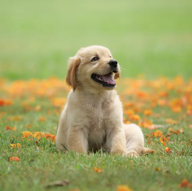

In [18]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

**HERE** we are acutally load the learner that we had in the model.pkl and they are basically pointing the same learner referred.

In [19]:
#|export
learn = load_learner('model.pkl')

NotImplementedError: cannot instantiate 'PosixPath' on your system

And then we call the predict function to the learner to predict the given image. And it is going to return (Boolean, The tensor of the firstimage, probability([probability of first category, and the other])).
**Note:** Unfortunately, Gradio doesn't manage tensor for now, so we dont need the tensor in the result of prediction.

In [17]:
learn.predict(im)

NameError: name 'learn' is not defined

In [14]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [16]:
classify_image(im)

NameError: name 'im' is not defined

In [15]:
#|export
image = gr.Image()
label = gr.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\Yuan Tao\anaconda3\envs\tunglinenv\Lib\site-packages\gradio\queueing.py", line 527, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yuan Tao\anaconda3\envs\tunglinenv\Lib\site-packages\gradio\route_utils.py", line 261, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yuan Tao\anaconda3\envs\tunglinenv\Lib\site-packages\gradio\blocks.py", line 1786, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yuan Tao\anaconda3\envs\tunglinenv\Lib\site-packages\gradio\blocks.py", line 1338, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yuan Tao\anaconda3\envs\tunglinenv\Lib\site-packages\anyio\to_thread.py", line 56, in run_sync
  

## end -

There is a migration of notebooktoscript function of nbdev.export so below is an working update to export.

In [20]:
import nbdev
import nbdev.export
nbdev.export.nb_export('app.ipynb', 'app')
print('Export successfully!')

Export successfully!
